# DBSCAN Algorithm(Density-Based Spatial Clustering of Applications with Noise)

In [5]:
'''
-density-based model.
-the areas of high density are separated by the areas of low density.
-the clusters can be found in any arbitrary shape.
-From the name, it is clear that the algorithm uses density to cluster
the data points and it has something to do with the noise.
-Application : Statewise density of languages.
-
'''

'\n-density-based model.\n-the areas of high density are separated by the areas of low density.\n-the clusters can be found in any arbitrary shape.\n-From the name, it is clear that the algorithm uses density to cluster\nthe data points and it has something to do with the noise.\n-Application : Statewise density of languages.\n-\n'

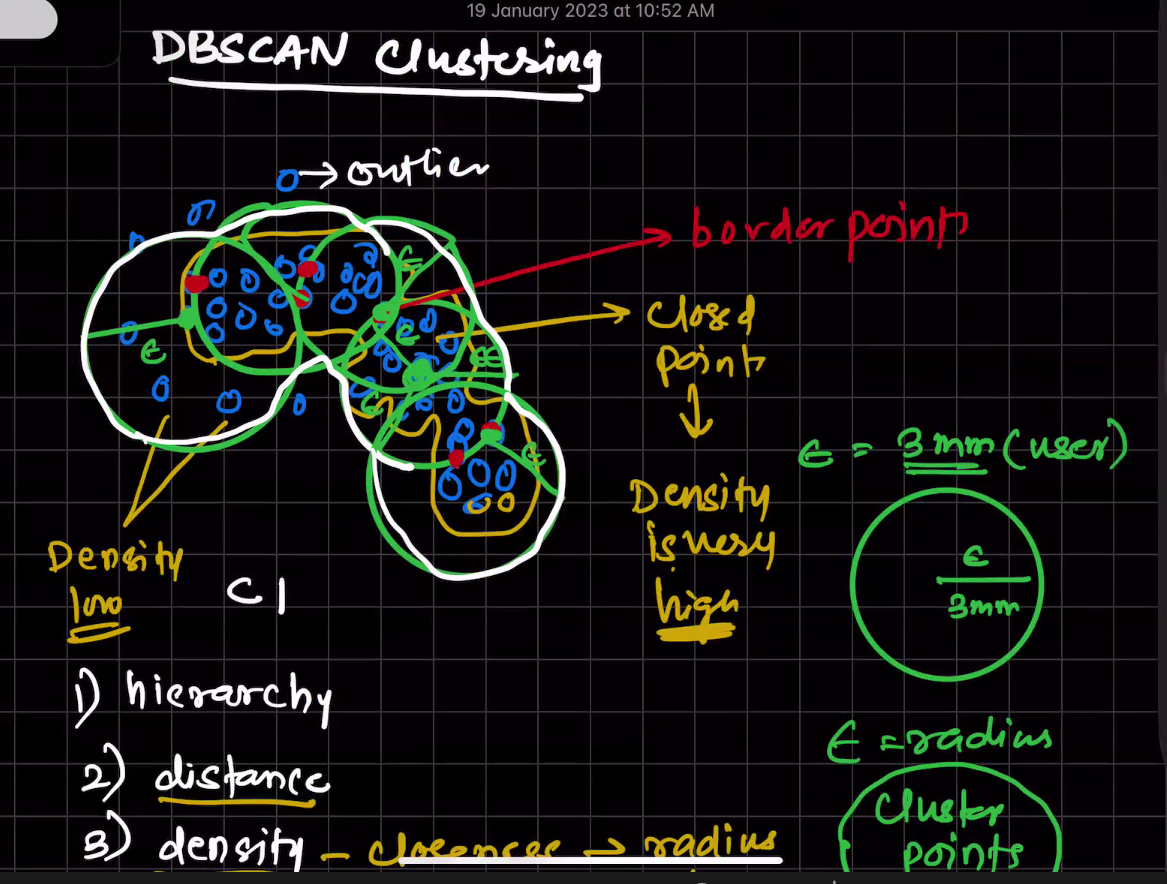
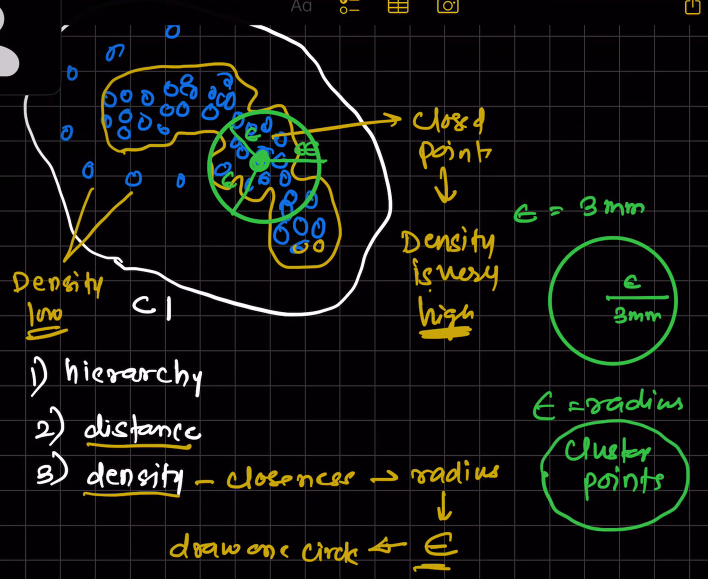
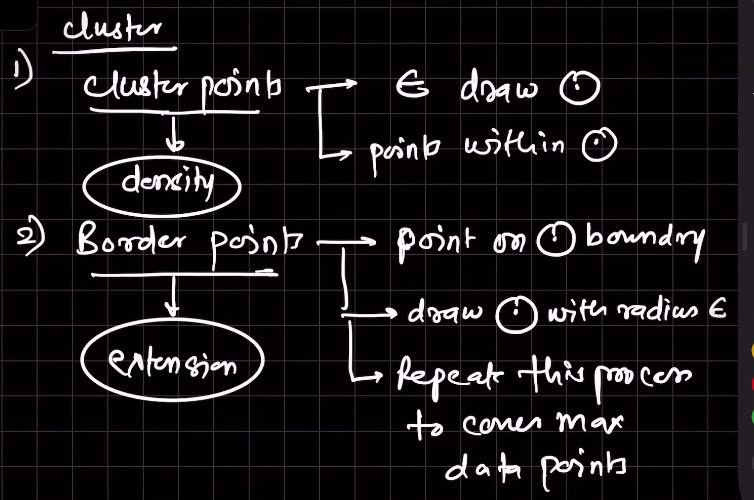
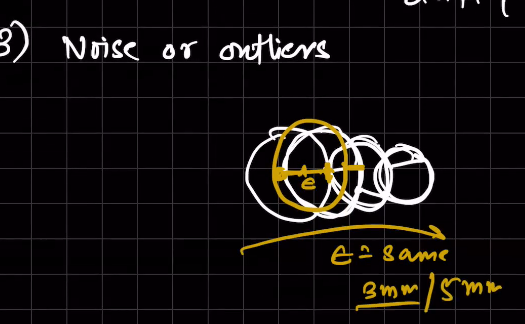
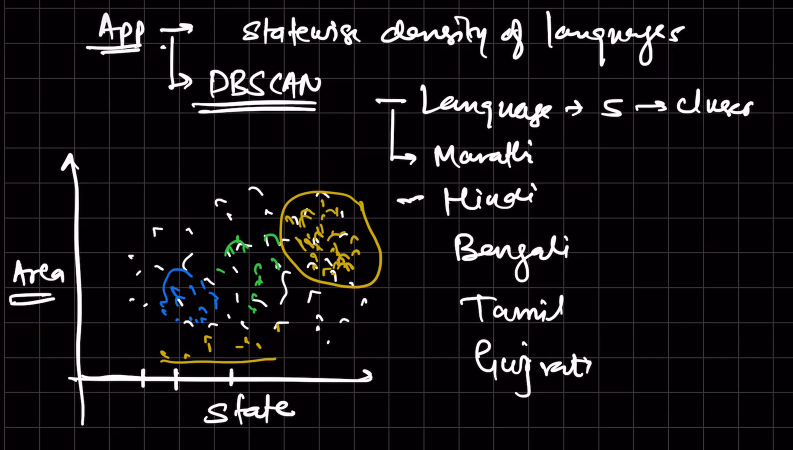

In [6]:
'''
In this algorithm, we have 3 types of data points.
Core Point: A point is a core point if it has more than MinPts points within eps. 
Border Point: A point which has fewer than MinPts within eps but it is in the neighborhood of a core point. 
Noise or outlier: A point which is not a core point or border point.
'''

'\nIn this algorithm, we have 3 types of data points.\nCore Point: A point is a core point if it has more than MinPts points within eps. \nBorder Point: A point which has fewer than MinPts within eps but it is in the neighborhood of a core point. \nNoise or outlier: A point which is not a core point or border point.\n'

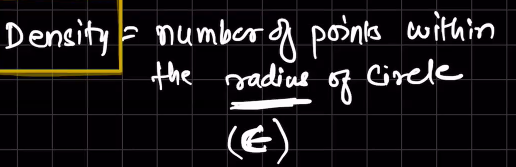
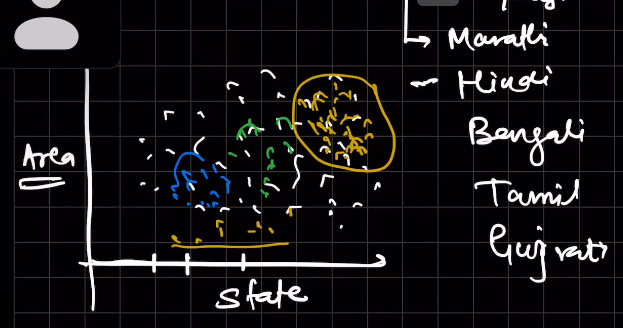

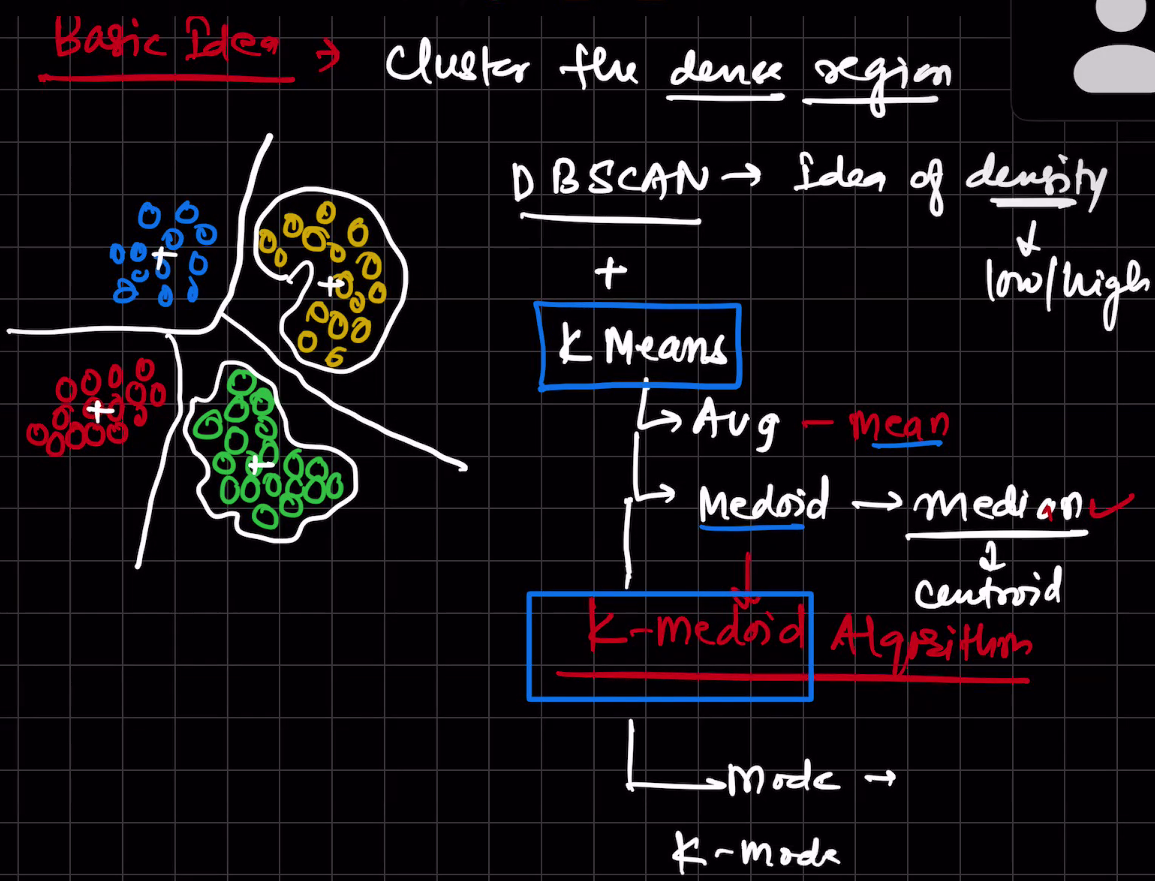


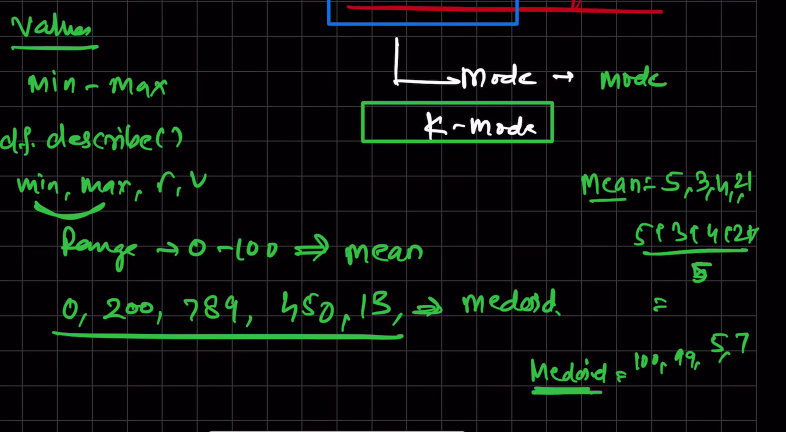

# DBScan Concept
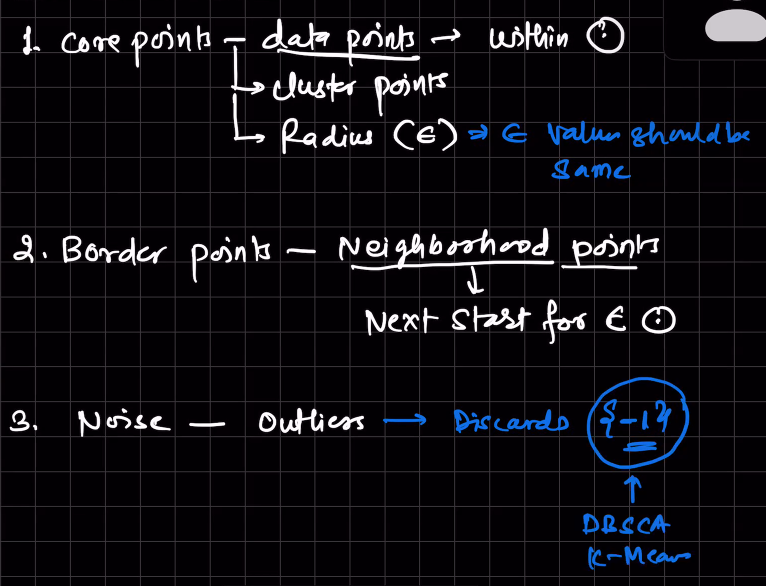

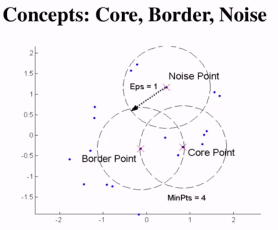

# hapharsed valued and shape of cluster is not good then we use median to get the centroid value and not the mean so we are using k-medioid.


# DBSCAN Implementation

In [7]:
import matplotlib.pyplot as plt
import numpy as np,pandas as pd

In [8]:
df=pd.read_csv('Customers.csv')
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [9]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
x=df.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [11]:
#feAture scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler().fit(x)
norm_data=sc.transform(x)

In [12]:
#Model Building
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=3,min_samples=4,metric='euclidean')
model1=model.fit(x)

In [13]:
model1.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [14]:
y_pred=model1.fit_predict(x)

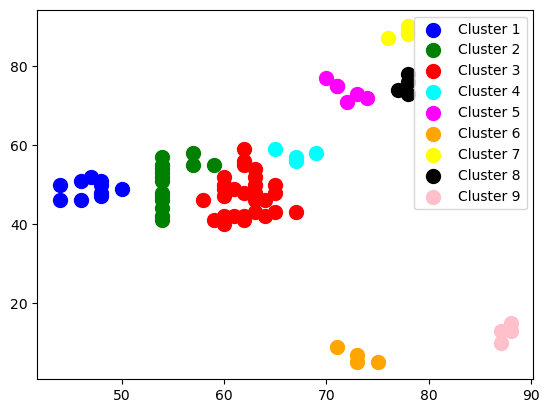

In [15]:
#visulaizing the clusters  
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  
plt.scatter(x[y_pred == 5, 0], x[y_pred == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')  
plt.scatter(x[y_pred == 6, 0], x[y_pred == 6, 1], s = 100, c = 'yellow', label = 'Cluster 7')  
plt.scatter(x[y_pred == 7, 0], x[y_pred == 7, 1], s = 100, c = 'black', label = 'Cluster 8')  
plt.scatter(x[y_pred == 8, 0], x[y_pred == 8, 1], s = 100, c = 'pink', label = 'Cluster 9')  
plt.legend()  
plt.show()  

# Dimension Reduction



2D converted to 3D
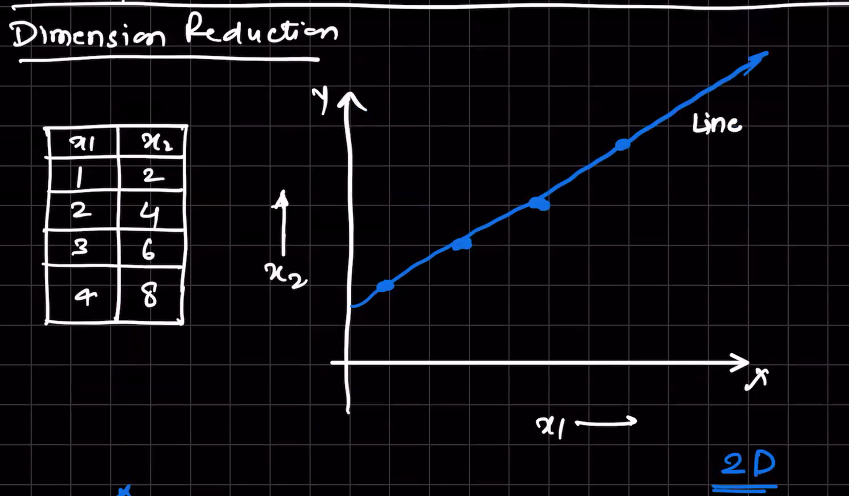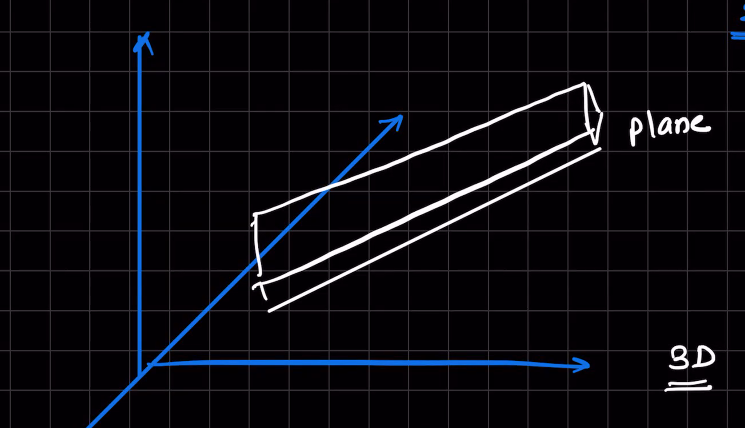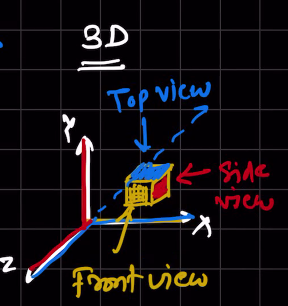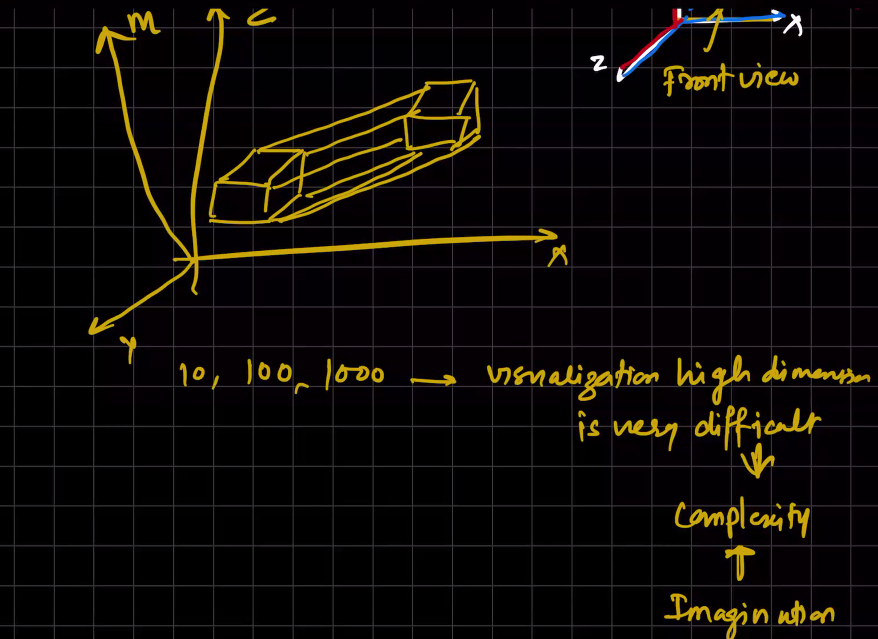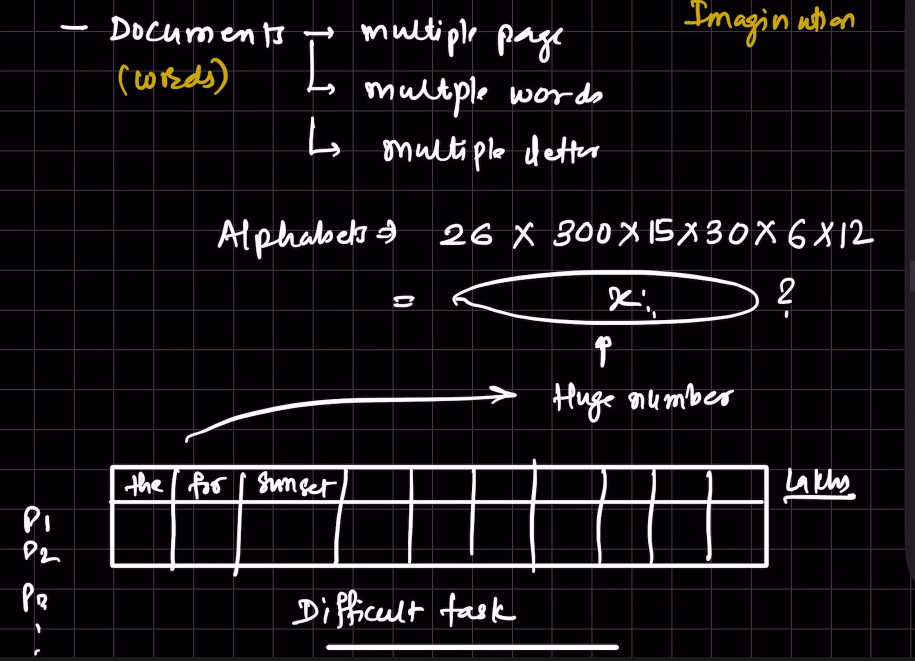
##### Each word is a feature. 


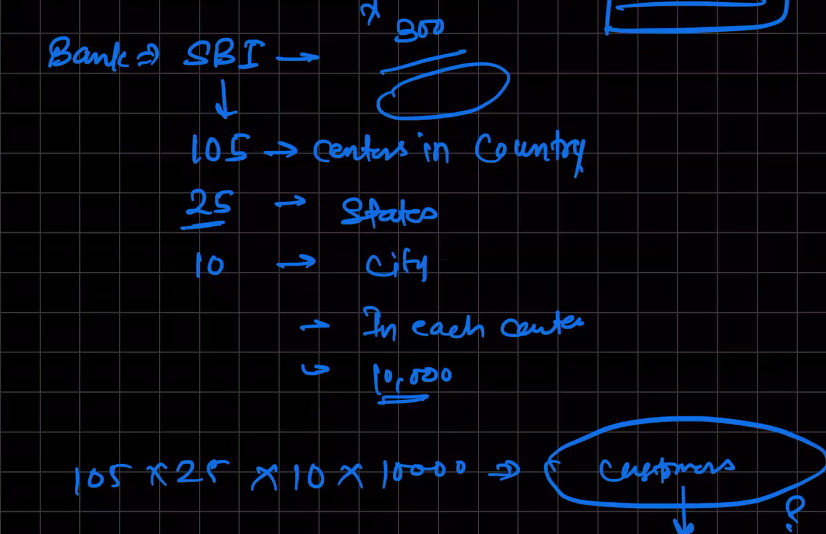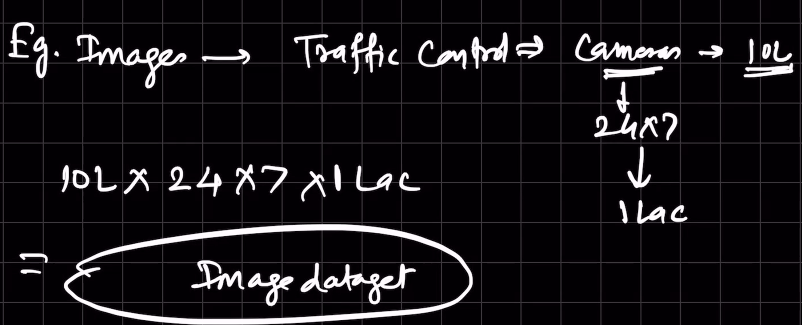

# Example of genetics
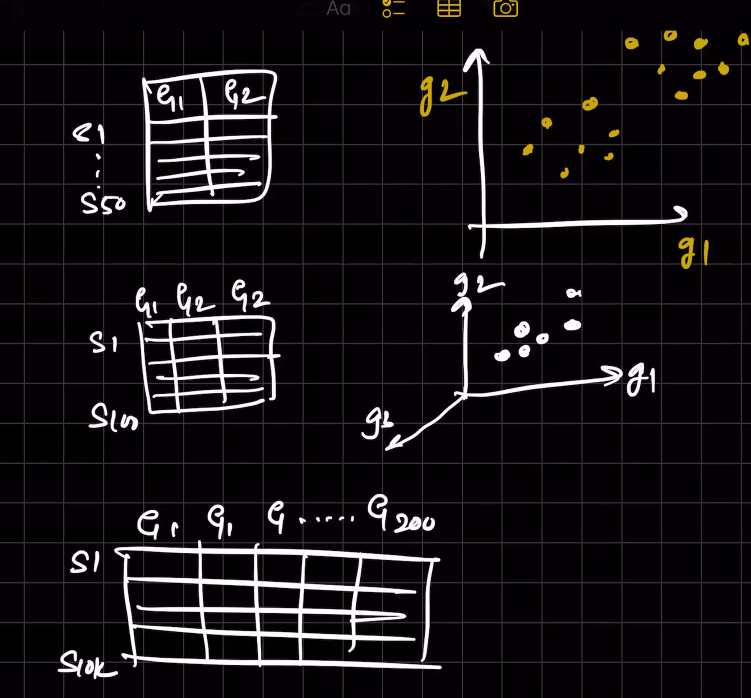

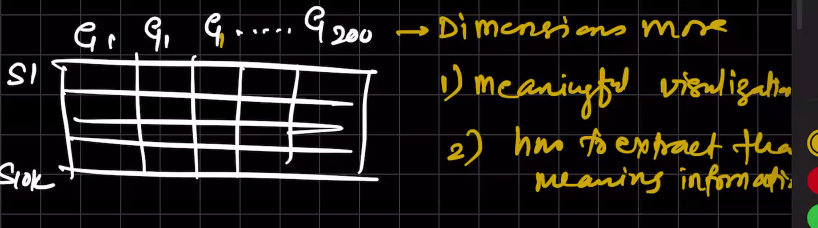
# Example of tumour cell
## solution of higher dimensions
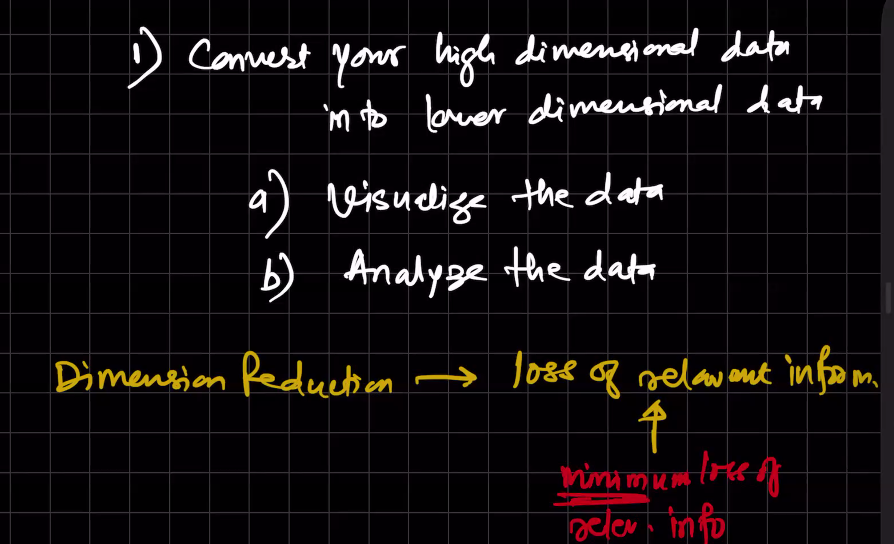
## Approaches to dimension reduction
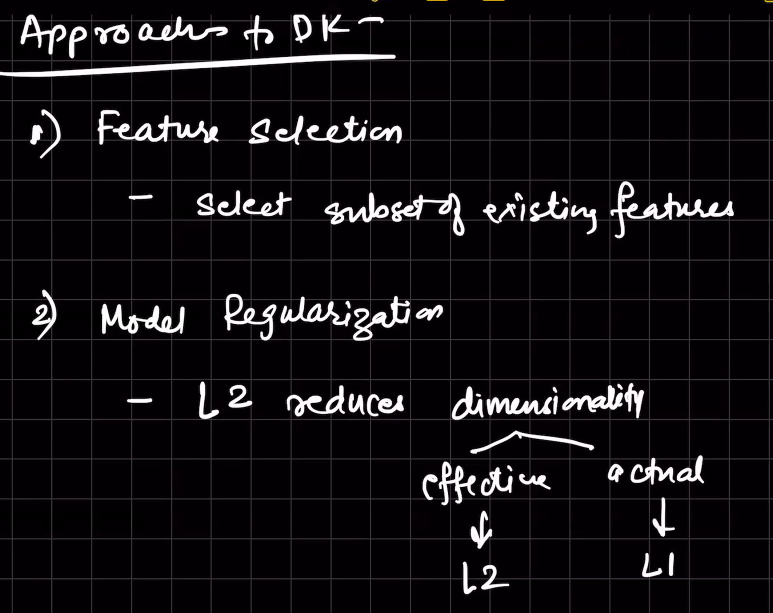


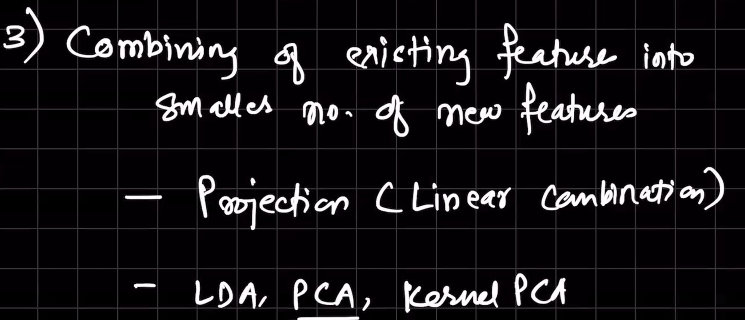

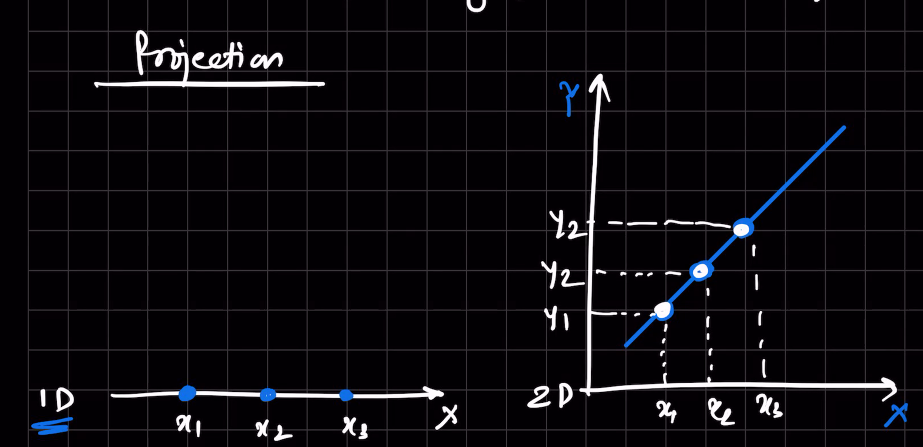
### projection
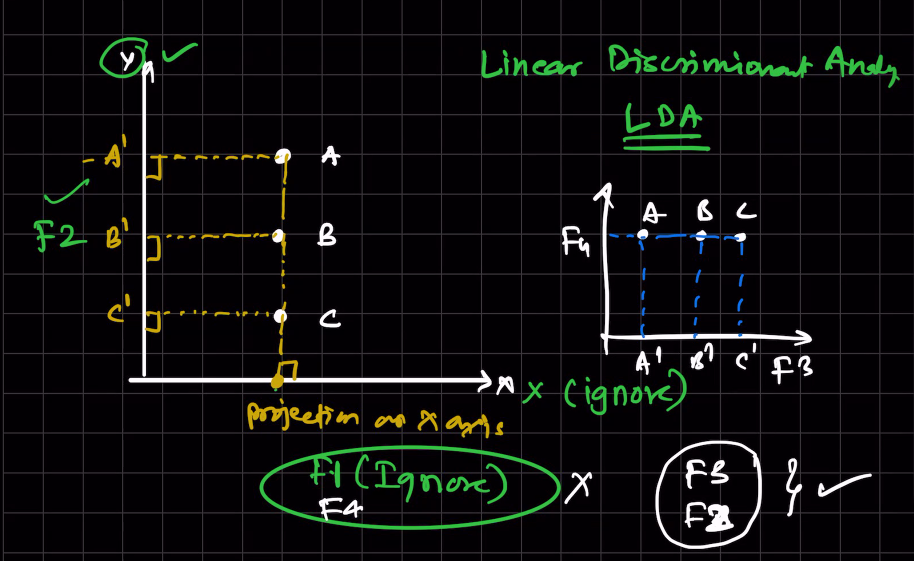
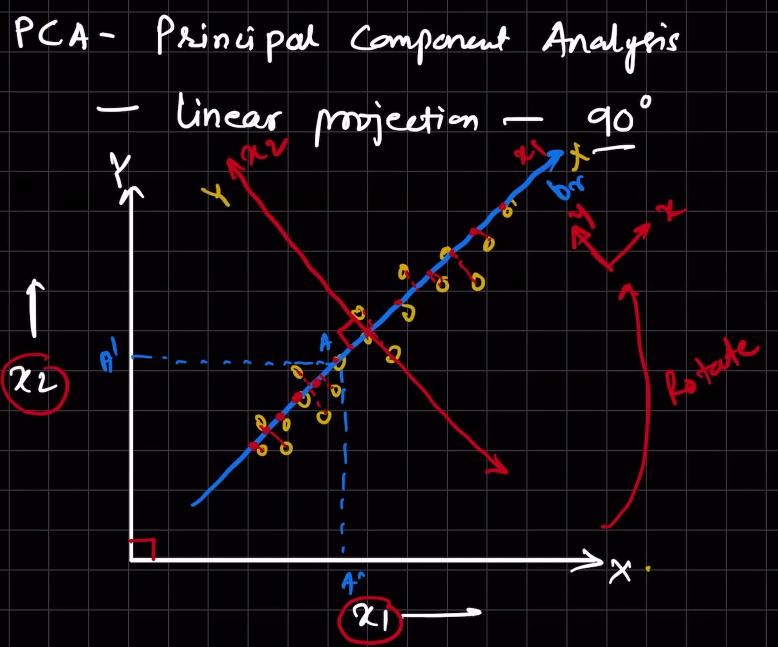

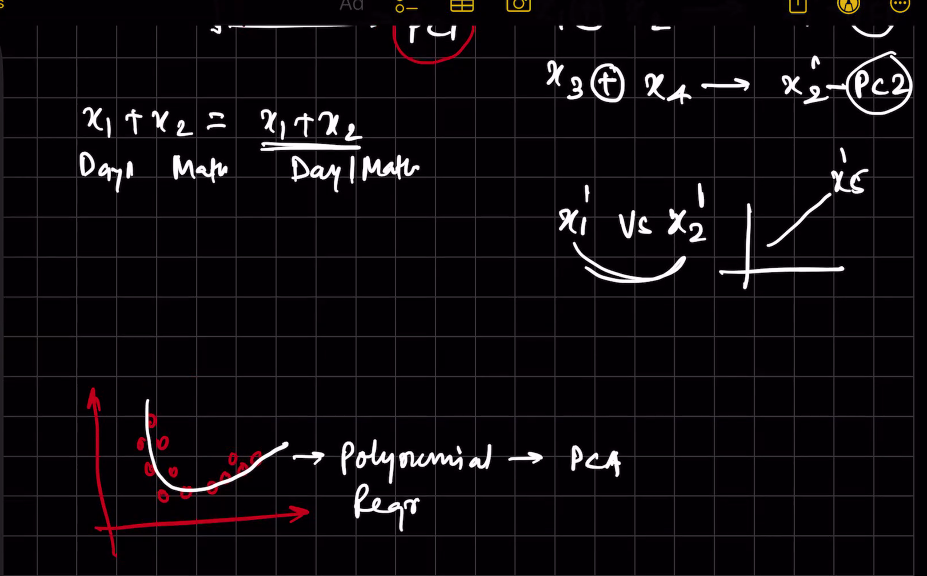

In [16]:
df=pd.read_csv('Wine.csv')
df

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  Customer_Segment  
0     3.92     1065                 1  
1     3.40     1050                 1  
2     3.17     1185                 1  
3     3.45     1480                 1  
4     2.93      735                 1  
..     ...      ...               ...  
173   1.74      740                 3  
174   1.56      750                 3  
175   1.56      835                 3  
176   1.62      840                 3  
177   1.60      560                 3  

[178 rows x 14 columns]

In [17]:
df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  Customer_Segment  
count       178.000000  178.000000  178.000000   178.000000        178.000000  
mean          5.058090    0.957449    2.611685   746.893258          1.938202  
std           2.318286    0.228572    0.709990   314.907474          0.775035  
min           1.280000    0.480000    1.270000   278.000000          1.000000  
25%           3.220000    0.782500    1.937500   500.500000          1.000000  
50%           4.690000    0.965000    2.780000   673.500000          2.000000  
75%           6.200000    1.120000    3.170000   985.000000          3.000000  
max          13.000000    1.710000    4.000000  1680.000000          3.000000

In [18]:
x = df.iloc[:,:-1].values  
y = df.iloc[:,-1].values  

In [19]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=1)  

In [20]:
#feature Scaling  
# For Data standardisation from lower value to higher value.
from sklearn.preprocessing import StandardScaler    
sc= StandardScaler()    
x_train= sc.fit_transform(x_train)    
x_test= sc.fit_transform(x_test)    

In [21]:
#model building
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model=LDA(n_components=2)
x_train=model.fit_transform(x_train,y_train)
x_test=model.transform(x_test)

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [23]:
#Predicting the test set result 
y_pred=classifier.predict(x_test) 
y_pred 

array([3, 2, 1, 2, 1, 3, 2, 1, 3, 2, 1, 1, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       3, 2, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 2, 2], dtype=int64)

In [24]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix,accuracy_score
cm= confusion_matrix(y_test, y_pred)  
cm

array([[14,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  9]], dtype=int64)

In [25]:
accuracy_score(y_test,y_pred)

1.0

# PCA

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df=pd.read_csv('Wine.csv')
df

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  Customer_Segment  
0     3.92     1065                 1  
1     3.40     1050                 1  
2     3.17     1185                 1  
3     3.45     1480                 1  
4     2.93      735                 1  
..     ...      ...               ...  
173   1.74      740                 3  
174   1.56      750                 3  
175   1.56      835                 3  
176   1.62      840                 3  
177   1.60      560                 3  

[178 rows x 14 columns]

In [28]:
x = df.iloc[:,:-1].values  
y = df.iloc[:,-1].values  

In [29]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=1)  

In [30]:
#feature Scaling  
# For Data standardisation from lower value to higher value.
from sklearn.preprocessing import StandardScaler    
sc= StandardScaler()    
x_train= sc.fit_transform(x_train)    
x_test= sc.fit_transform(x_test)    

In [31]:
#PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_train=pca.fit_transform(x_train)
x_test=pca.fit_transform(x_test)

In [32]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state=0)
classifier1.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [33]:
#Predicting the test set result 
y_pred=classifier.predict(x_test) 
y_pred 

array([2, 1, 2, 3, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 3, 1, 2, 2, 1, 2, 2, 1,
       1, 3, 2, 1, 2, 3, 2, 1, 3, 2, 2, 2, 1, 1], dtype=int64)

In [34]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix,accuracy_score
cm= confusion_matrix(y_test, y_pred)  
cm

array([[ 0, 13,  1],
       [ 9,  0,  4],
       [ 5,  4,  0]], dtype=int64)

In [35]:
accuracy_score(y_test,y_pred)

0.0

In [36]:
#PCA Kernel
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2,kernel='rbf')
X_train=kpca.fit_transform(X_train)
X_test=kpca.fit_transform(X_test)

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state=0)
classifier2.fit(X_train,y_train)

In [ ]:
y_pred2 = classifier2.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred2)
cm

In [ ]:
accuracy_score(y_test,y_pred2)

# HW

In [ ]:
import pandas as pd ,numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('dataset.csv')
df

In [ ]:
x = df.iloc[:,:-1].values  
y = df.iloc[:,-1].values  

In [ ]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=1)  

In [ ]:
#feature Scaling  
# For Data standardisation from lower value to higher value.
from sklearn.preprocessing import StandardScaler    
sc= StandardScaler()    
x_train= sc.fit_transform(x_train)    
x_test= sc.fit_transform(x_test)    

In [ ]:
#model building
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model=LDA(n_components=2)
x_train=model.fit_transform(x_train,y_train)
x_test=model.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

In [ ]:
#Predicting the test set result 
y_pred=classifier.predict(x_test) 
y_pred 

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix,accuracy_score
cm= confusion_matrix(y_test, y_pred)  
cm

In [ ]:
accuracy_score(y_test,y_pred)